## lightGBM使用简介
by 寒小阳(hanxiaoyang.ml@gmail.com)

#### 结合pandas与sklearn的小例子

In [1]:
# coding: utf-8
# pylint: disable = invalid-name, C0111
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 用pandas载入数据集
print('Load data...')
df_train = pd.read_csv('data/regression.train', header=None, sep='\t')
df_test = pd.read_csv('data/regression.test', header=None, sep='\t')

y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

print('Start training...')
# 训练
gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

print('Start predicting...')
# 预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# 评估
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

print('Calculate feature importances...')
# 输出特征重要度
print('Feature importances:', list(gbm.feature_importances_))

# 交叉验证与网格搜索
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid)

gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Load data...
Start training...
[1]	valid_0's l1: 0.536072
Train until valid scores didn't improve in 5 rounds.
[2]	valid_0's l1: 0.528484
[3]	valid_0's l1: 0.521163
[4]	valid_0's l1: 0.514374
[5]	valid_0's l1: 0.508836
[6]	valid_0's l1: 0.502996
[7]	valid_0's l1: 0.497912
[8]	valid_0's l1: 0.492616
[9]	valid_0's l1: 0.487243
[10]	valid_0's l1: 0.482528


/Library/Python/2.7/site-packages/lightgbm-0.1-py2.7.egg/lightgbm/engine.py:163: UserWarning: Using Pandas (default) integer column names, not column indexes. You can use indexes with DataFrame.values.
  booster = Booster(params=params, train_set=train_set)


[11]	valid_0's l1: 0.478176
[12]	valid_0's l1: 0.473355
[13]	valid_0's l1: 0.469354
[14]	valid_0's l1: 0.465396
[15]	valid_0's l1: 0.46168
[16]	valid_0's l1: 0.45808
[17]	valid_0's l1: 0.454562
[18]	valid_0's l1: 0.451392
[19]	valid_0's l1: 0.448304
[20]	valid_0's l1: 0.445538
Start predicting...
('The rmse of prediction is:', 0.49226770162247319)
Calculate feature importances...
('Feature importances:', [0.038333334, 0.015, 0.0033333334, 0.061666667, 0.0066666668, 0.10166667, 0.025, 0.0033333334, 0.0, 0.031666666, 0.0049999999, 0.0083333338, 0.0016666667, 0.036666665, 0.013333334, 0.0066666668, 0.0016666667, 0.015, 0.0, 0.0083333338, 0.0, 0.053333335, 0.094999999, 0.0066666668, 0.086666666, 0.15666667, 0.086666666, 0.13166666])


/Library/Python/2.7/site-packages/ipykernel/__main__.py:31: UserWarning: Using Pandas (default) integer column names, not column indexes. You can use indexes with DataFrame.values.
/Library/Python/2.7/site-packages/sklearn/base.py:386: UserWarning: Using Pandas (default) integer column names, not column indexes. You can use indexes with DataFrame.values.
  return r2_score(y, self.predict(X), sample_weight=sample_weight,


('Best parameters found by grid search are:', {'n_estimators': 40, 'learning_rate': 0.1})


### 可视化

/Library/Python/2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/Library/Python/2.7/site-packages/ipykernel/pylab/config.py:44: DeprecationWarning: InlineBackend._config_changed is deprecated: use @observe and @unobserve instead.
  def _config_changed(self, name, old, new):
/Library/Python/2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)
/Library/Python/2.7/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/Library/Python/2.7/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_pri

Load data...
Start training...
[10]	training's l2: 0.502292	training's l1: 0.468727	valid_1's l2: 0.50787	valid_1's l1: 0.472408
[20]	training's l2: 0.457516	training's l1: 0.4402	valid_1's l2: 0.456708	valid_1's l1: 0.438702
[30]	training's l2: 0.445064	training's l1: 0.423063	valid_1's l2: 0.440541	valid_1's l1: 0.419234
[40]	training's l2: 0.439241	training's l1: 0.411736	valid_1's l2: 0.432835	valid_1's l1: 0.406922
[50]	training's l2: 0.435594	training's l1: 0.40439	valid_1's l2: 0.429046	valid_1's l1: 0.400248
[60]	training's l2: 0.432508	training's l1: 0.398102	valid_1's l2: 0.42435	valid_1's l1: 0.392755
[70]	training's l2: 0.429998	training's l1: 0.393906	valid_1's l2: 0.421173	valid_1's l1: 0.387568
[80]	training's l2: 0.42804	training's l1: 0.390179	valid_1's l2: 0.419719	valid_1's l1: 0.384377
[90]	training's l2: 0.42618	training's l1: 0.386928	valid_1's l2: 0.417908	valid_1's l1: 0.381355
[100]	training's l2: 0.424344	training's l1: 0.384206	valid_1's l2: 0.416937	valid_1'

/Library/Python/2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):


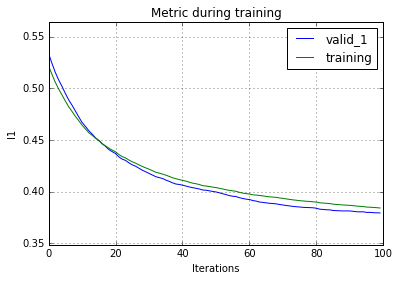

Plot feature importances...


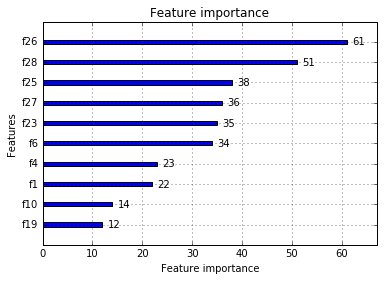

In [2]:
# coding: utf-8
# pylint: disable = invalid-name, C0111
%matplotlib inline
import sys
import lightgbm as lgb
import pandas as pd

try:
    import matplotlib.pyplot as plt
except ImportError:
    raise ImportError('You need to install matplotlib for plot_example.py.')

# load or create your dataset
print('Load data...')
df_train = pd.read_csv('data/regression.train', header=None, sep='\t')
df_test = pd.read_csv('data/regression.test', header=None, sep='\t')

y_train = df_train[0]
X_train = df_train.drop(0, axis=1)
y_test = df_test[0]
X_test = df_test.drop(0, axis=1)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(28)],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

print('Plot metrics during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

print('Plot feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

#print('Plot 84th tree...')  # one tree use categorical feature to split
#ax = lgb.plot_tree(gbm, tree_index=83, figsize=(20, 8), show_info=['split_gain'])
#plt.show()